# Heart Disease Predictor

- This *test* branch is for improving this model.
- I need to know more about this dataset and make my Data Science practices more clear, easy to understand, and more robust.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

#### Life cycle of a Data Science project:
- Data Collection
- EDA
- Data Preprocessing
- Feature Engineering
- Model building and evaluation
- Model deployment

In [2]:
data = pd.read_csv('./data/framingham.csv')

In [3]:
data.shape

(4238, 16)

## 1. EDA

In [46]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

- visualize the *null values*

<AxesSubplot:>

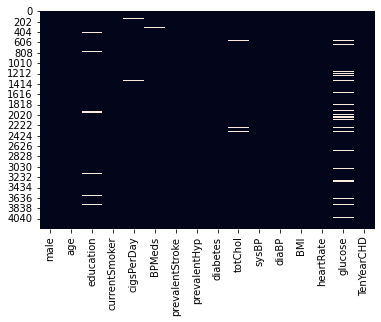

In [47]:
sns.heatmap(data.isnull(), cbar=False)

- There are some features having null values so, we need to perform imputation in the dataset.
- why inputation? why not delete the feature itself?
    - because none of the feature contains more than half null values, infact the maximum null values contained is in *glucose* feature which is 388/4238 = 0.091 or *9.1%* approx.
---

##### No null values in the dataset

In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

- No categorical features. All features are Nominal, so no encoding required.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


- check for duplicates

In [9]:
data_dup = data.duplicated()
data_dup.sum()

723

- so we have 723 duplicates in the dataset. So, let's drop them.

In [10]:
data.drop_duplicates(inplace=True)
data.shape

(302, 14)

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


- plot *correlation matrix*

<AxesSubplot:>

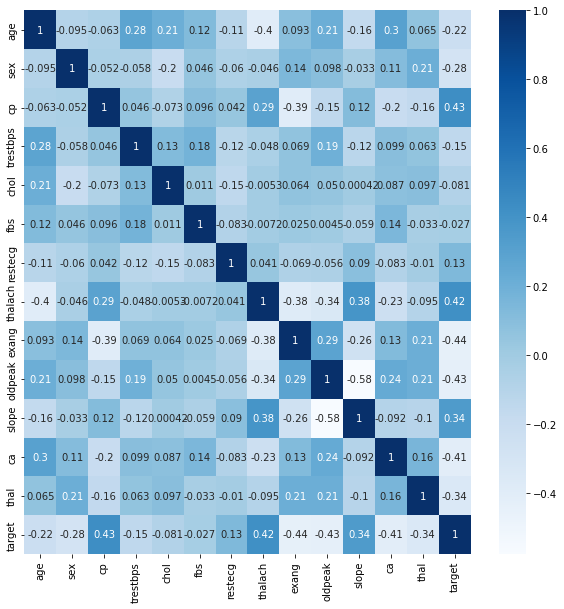

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cbar=True, cmap='Blues', annot=True)

### How many have the heart disease and how many don't have the heart disease?

In [13]:
data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

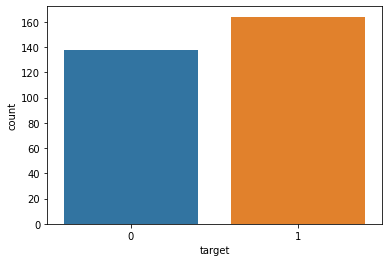

In [14]:
sns.countplot(x='target', data=data)

### Count the no. of males and females

In [15]:
data['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

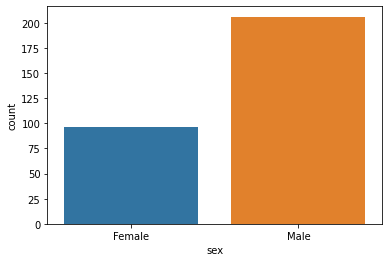

In [16]:
sns.countplot(x='sex', data=data)
plt.xticks([0,1],['Female','Male'])
plt.show()

### Categorize males and females on the basis of disease or no disease

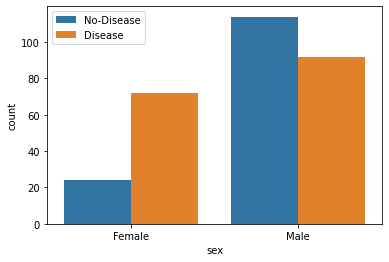

In [17]:
sns.countplot(x='sex', data=data, hue='target')
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No-Disease', 'Disease'])
plt.show()

In [43]:
data.target.unique()

array([0, 1])

- the above values of the target variable are categorical and since this is a classification problem, i.e the person has or doesn't have the disease, applying the **Logistic regression** model can be suitable

### 2. Feature selection

In [20]:
def correlation(data, threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                column_name = corr_matrix.columns[i]
                col_corr.add(column_name)
    return col_corr

In [21]:
corr_features = correlation(data, 0.85)
print(set(corr_features))

set()


- so, there are no features that are correlated to more than 85%
- no need to drop any of the features, except for the **traget** variable during the training process

### 3. Split the dataset

In [161]:
X = data.drop(['target'],axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [162]:
print(X_train.shape)
print(X_test.shape)

(211, 13)
(91, 13)


In [164]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [165]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
128,52,1,2,138,223,0,1,169,0,0.0,2,4,2
334,60,1,0,130,206,0,0,132,1,2.4,1,2,3
333,54,0,2,110,214,0,1,158,0,1.6,1,0,2
240,54,0,1,132,288,1,0,159,1,0.0,2,1,2
353,57,1,0,110,201,0,1,126,1,1.5,1,0,1


In [166]:
y_train.head()

128    1
334    0
333    1
240    1
353    1
Name: target, dtype: int64

### 4. Perform feature scaling

### Which features needs to be scaled?
Features that are out of the scale of the normal range of the dataset need to be brought in the same range as the others. For example the range of **age** is not the same or even closer to **sex, cp** and some other features. So features like these needs to be scaled down.

**Feature scaling is performed on the following features** on both X_train as well as X_test:

age, trestbps, chol, thalach, oldpeak

- Scale X_train

In [167]:
scaler = StandardScaler()
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
128,-0.258557,1,2,0.388437,-0.431939,0,1,0.865615,0,-0.878501,2,4,2
334,0.600586,1,0,-0.075270,-0.759709,0,0,-0.717763,1,1.197434,1,2,3
333,-0.043772,0,2,-1.234538,-0.605465,0,1,0.394881,0,0.505456,1,0,2
240,-0.043772,0,1,0.040657,0.821297,1,0,0.437675,1,-0.878501,2,1,2
353,0.278407,1,0,-1.234538,-0.856112,0,1,-0.974527,1,0.418958,1,0,1


- Scale X_test

In [168]:
X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
97,-0.173694,1,0,-0.512770,0.644740,0,1,-2.618806,1,0.766908,1,2,3
40,1.263230,0,2,1.525596,2.170704,0,0,-0.019383,0,-0.263182,2,0,2
10,1.981692,0,0,-1.118770,-1.957224,0,1,-1.226258,0,0.423545,1,0,2
182,0.664512,1,0,0.423777,0.859940,0,0,0.862564,0,0.080181,1,2,3
175,0.185537,0,0,3.729234,0.762122,1,0,-0.854912,1,2.483726,0,2,3


### 5. Train and fit the model
1. Logistic regression

1. **Logistic Regression**

In [182]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [183]:
y_pred = log_reg.predict(X_test)
confusion_matrix(y_pred, y_test)
log_reg.score(X_test, y_test)

0.8681318681318682